In [1]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot

sb.set_theme()

In [4]:
path = "/home/at70870/local_scratch/SynthCortical/scores.csv"
df = pd.read_csv(path, index_col=0)
df["data"] = df["data"].str.removeprefix("SynthCortical/")
df["clear"] = df["clear"].apply(lambda x:eval(x)[0]).str.removeprefix("SynthCortical/")
df

,subject,session,generation,motion_mm,motion_binary,identifier,data,clear
0,sub-NDARRK617NRL,ses-VNav,gen-000,1.571818,True,sub-NDARRK617NRL_ses-VNav_gen-000,sub-NDARRK617NRL/ses-VNav/gen-000/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-000/anat/sub-NDA...
1,sub-NDARRK617NRL,ses-VNav,gen-001,0.884135,True,sub-NDARRK617NRL_ses-VNav_gen-001,sub-NDARRK617NRL/ses-VNav/gen-001/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-001/anat/sub-NDA...
2,sub-NDARRK617NRL,ses-VNav,gen-002,0.000000,False,sub-NDARRK617NRL_ses-VNav_gen-002,sub-NDARRK617NRL/ses-VNav/gen-002/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-002/anat/sub-NDA...
3,sub-NDARRK617NRL,ses-VNav,gen-003,1.152455,True,sub-NDARRK617NRL_ses-VNav_gen-003,sub-NDARRK617NRL/ses-VNav/gen-003/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-003/anat/sub-NDA...
4,sub-NDARRK617NRL,ses-VNav,gen-004,0.825618,True,sub-NDARRK617NRL_ses-VNav_gen-004,sub-NDARRK617NRL/ses-VNav/gen-004/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-004/anat/sub-NDA...
...,...,...,...,...,...,...,...,...
43895,sub-NDARYE850ZVD,ses-HCP,gen-095,1.223476,True,sub-NDARYE850ZVD_ses-HCP_gen-095,sub-NDARYE850ZVD/ses-HCP/gen-095/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-095/anat/sub-NDAR...
43896,sub-NDARYE850ZVD,ses-HCP,gen-096,1.978532,True,sub-NDARYE850ZVD_ses-HCP_gen-096,sub-NDARYE850ZVD/ses-HCP/gen-096/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-096/anat/sub-NDAR...
43897,sub-NDARYE850ZVD,ses-HCP,gen-097,0.349965,True,sub-NDARYE850ZVD_ses-HCP_gen-097,sub-NDARYE850ZVD/ses-HCP/gen-097/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-097/anat/sub-NDAR...
43898,sub-NDARYE850ZVD,ses-HCP,gen-098,1.913466,True,sub-NDARYE850ZVD_ses-HCP_gen-098,sub-NDARYE850ZVD/ses-HCP/gen-098/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-098/anat/sub-NDAR...


In [6]:
subjects = df["subject"].unique()
train, val_test = train_test_split(subjects, test_size=0.4)
val, test = train_test_split(val_test, test_size=0.5)
len(train), len(val), len(test)

(213, 71, 71)

<Axes: xlabel='group', ylabel='Percent'>

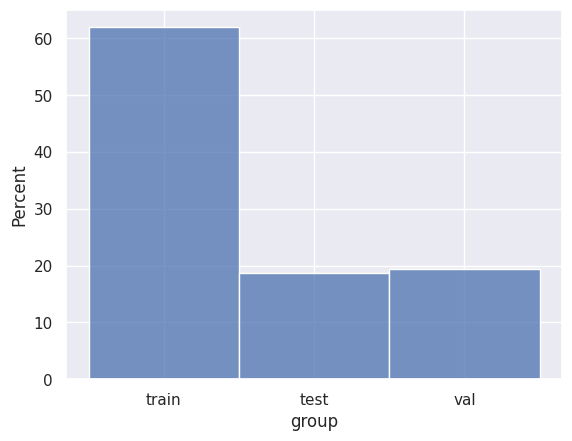

In [7]:
df["group"] = "train"
df.loc[df["subject"].isin(val), "group"] = "val"
df.loc[df["subject"].isin(test), "group"] = "test"
df[df["subject"].isin(val)]["group"]
sb.histplot(df, x="group", stat="percent")

In [8]:
(df["group"] == "train").sum(), (df["group"] == "val").sum()

(27200, 8500)

In [9]:
df

,subject,session,generation,motion_mm,motion_binary,identifier,data,clear,group
0,sub-NDARRK617NRL,ses-VNav,gen-000,1.571818,True,sub-NDARRK617NRL_ses-VNav_gen-000,sub-NDARRK617NRL/ses-VNav/gen-000/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-000/anat/sub-NDA...,train
1,sub-NDARRK617NRL,ses-VNav,gen-001,0.884135,True,sub-NDARRK617NRL_ses-VNav_gen-001,sub-NDARRK617NRL/ses-VNav/gen-001/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-001/anat/sub-NDA...,train
2,sub-NDARRK617NRL,ses-VNav,gen-002,0.000000,False,sub-NDARRK617NRL_ses-VNav_gen-002,sub-NDARRK617NRL/ses-VNav/gen-002/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-002/anat/sub-NDA...,train
3,sub-NDARRK617NRL,ses-VNav,gen-003,1.152455,True,sub-NDARRK617NRL_ses-VNav_gen-003,sub-NDARRK617NRL/ses-VNav/gen-003/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-003/anat/sub-NDA...,train
4,sub-NDARRK617NRL,ses-VNav,gen-004,0.825618,True,sub-NDARRK617NRL_ses-VNav_gen-004,sub-NDARRK617NRL/ses-VNav/gen-004/anat/sub-NDA...,sub-NDARRK617NRL/ses-VNav/gen-004/anat/sub-NDA...,train
...,...,...,...,...,...,...,...,...,...
43895,sub-NDARYE850ZVD,ses-HCP,gen-095,1.223476,True,sub-NDARYE850ZVD_ses-HCP_gen-095,sub-NDARYE850ZVD/ses-HCP/gen-095/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-095/anat/sub-NDAR...,val
43896,sub-NDARYE850ZVD,ses-HCP,gen-096,1.978532,True,sub-NDARYE850ZVD_ses-HCP_gen-096,sub-NDARYE850ZVD/ses-HCP/gen-096/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-096/anat/sub-NDAR...,val
43897,sub-NDARYE850ZVD,ses-HCP,gen-097,0.349965,True,sub-NDARYE850ZVD_ses-HCP_gen-097,sub-NDARYE850ZVD/ses-HCP/gen-097/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-097/anat/sub-NDAR...,val
43898,sub-NDARYE850ZVD,ses-HCP,gen-098,1.913466,True,sub-NDARYE850ZVD_ses-HCP_gen-098,sub-NDARYE850ZVD/ses-HCP/gen-098/anat/sub-NDAR...,sub-NDARYE850ZVD/ses-HCP/gen-098/anat/sub-NDAR...,val


In [10]:
df.to_csv(path)